<a href="https://colab.research.google.com/github/jdxxmahmud/mahdy-sir-re-acad-course/blob/main/Phase%201/Individual%20Assignments/Assignment%203%20-%20KNN/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Connecting google drive and setting working directory

In [2]:
# from google.colab import drive
# drive.mount('/content/drive', force_remount = True)
# %cd /content/drive

In [3]:
working_directory = 'MyDrive/Colab Notebooks/Mahdy Sir Research Academy Course/Phase 1/Individual Assignments/Assignment 3'

In [4]:
%cd -q $working_directory

#### Importing Libraries

In [5]:
from skimage import exposure, filters
from scipy.ndimage import convolve

from sklearn.preprocessing import LabelEncoder

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


In [7]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

## Loading the dataset and labels

In [8]:
img_data = np.load('data.npy')
labels = np.load('labels.npy')

### Showing data

In [9]:
def view_image(data, index):
  index = 0

  plt.imshow(data[index], cmap='gray')
  plt.title('Label: {}'.format(labels[index]))
  plt.axis('off')
  plt.show()

In [10]:
def show_img_side_by_side(image1, image2):
  plt.subplot(1, 2, 1)
  plt.imshow(image1, cmap='gray')
  plt.title('Original Image')
  plt.axis('off')

  plt.subplot(1, 2, 2)
  plt.imshow(image2, cmap='gray')
  plt.title('Processed Image')
  plt.axis('off')

## Preprocessing image data

#### Sharpen Image

In [11]:
def sharpen_image(image, alpha = 0.2):
    # Sharpening image
    laplacian = np.array([[0, -1, 0],
                          [-1, 4, -1],
                          [0, -1, 0]])
    sharpened_image = image + alpha * convolve(image, laplacian)
    sharpened_image = np.clip(sharpened_image, 0, 1)  # Clip values to range [0, 1]

    return sharpened_image

#### Blurr Image

In [12]:
def blurr_image(image, sigma = 1):
  # Gaussian Blur to reduce noise
  image_blurred = filters.gaussian(image, sigma)
  return image_blurred

#### Create Negative Image

In [13]:
def create_negative_image(image):

    # Maximum pixel value
    max_pixel_value = np.max(image)

    # Create the negative image by subtracting each pixel value from the maximum
    negative_image = max_pixel_value - image

    return negative_image

#### Threshold Image

In [14]:
def threshold_image(image, threshold = 150):
    # Apply thresholding
    thresholded_image = np.where(image < threshold, 0, 255)
    return thresholded_image

#### Applying preprocessing function

In [37]:
def preprocess_images(data):
    preprocessed_data = []
    for image in data:

        # Histogram Equalization
        image = exposure.equalize_hist(image)

        image = sharpen_image(image)



        image = create_negative_image(image)

        image = blurr_image(image)

        # image = threshold_image(image)

        preprocessed_data.append(image)
    return np.array(preprocessed_data)

In [38]:
copy_data = img_data.copy()
copy_data = preprocess_images(copy_data)

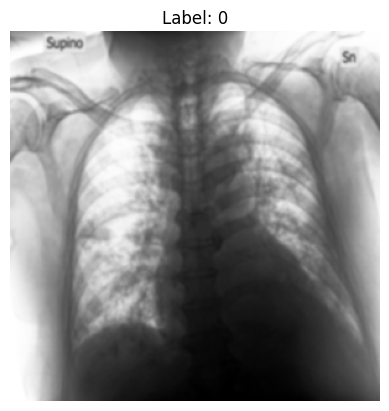

In [39]:
view_image(copy_data, 0)

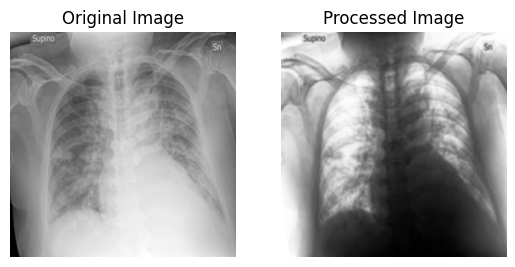

In [40]:
show_img_side_by_side(img_data[0], copy_data[0])

#### Data Reshape and Lebel Encoding for labels

In [41]:
data = copy_data.reshape(copy_data.shape[0], -1)

# Encode labels into numeric values
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

In [42]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42, stratify = labels)

## Implmenting KNN

#### Function for plotting confusion matrix

In [43]:
def plot_confusion_matrix(matrix, classes, title='Confusion Matrix', cmap=plt.cm.Greens):
    # Create a DataFrame for better visualization
    cm_df = pd.DataFrame(matrix, index=classes, columns=classes)

    # Plot the heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_df, annot=True, cmap=cmap, fmt='d')
    plt.title(title)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

#### Function for all the evaluation metrics

In [44]:
def evaluate_classification(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    report = classification_report(y_true, y_pred)
    matrix = confusion_matrix(y_true, y_pred)
    plot_confusion_matrix(matrix, ['Infected', 'Normal'])

    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("\nClassification Report:\n", report)
    print("\nConfusion Matrix:\n", matrix)


#### Different Metrics with fixed K value



Using distance metric: manhattan
Evaluation results for metric manhattan


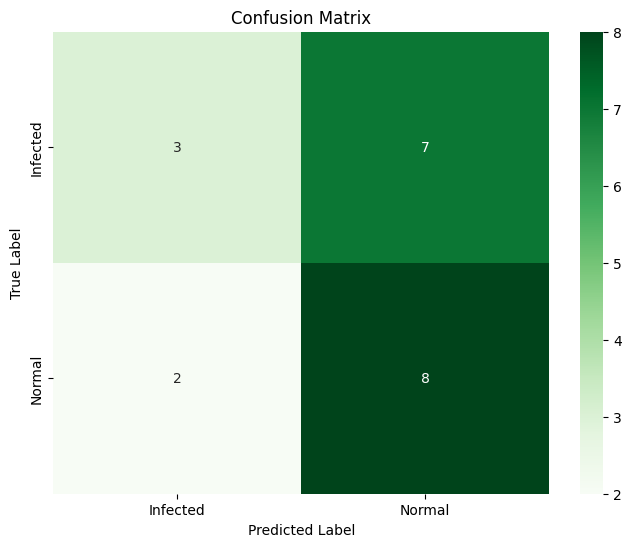

Accuracy: 0.55
Precision: 0.5333333333333333
Recall: 0.8
F1 Score: 0.64

Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.30      0.40        10
           1       0.53      0.80      0.64        10

    accuracy                           0.55        20
   macro avg       0.57      0.55      0.52        20
weighted avg       0.57      0.55      0.52        20


Confusion Matrix:
 [[3 7]
 [2 8]]
---------------------------------------


Using distance metric: chebyshev
Evaluation results for metric chebyshev


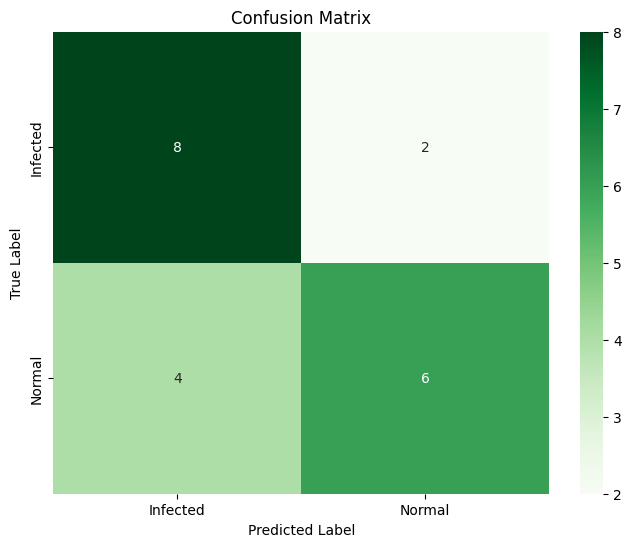

Accuracy: 0.7
Precision: 0.75
Recall: 0.6
F1 Score: 0.6666666666666665

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.80      0.73        10
           1       0.75      0.60      0.67        10

    accuracy                           0.70        20
   macro avg       0.71      0.70      0.70        20
weighted avg       0.71      0.70      0.70        20


Confusion Matrix:
 [[8 2]
 [4 6]]
---------------------------------------


Using distance metric: minkowski
Evaluation results for metric minkowski


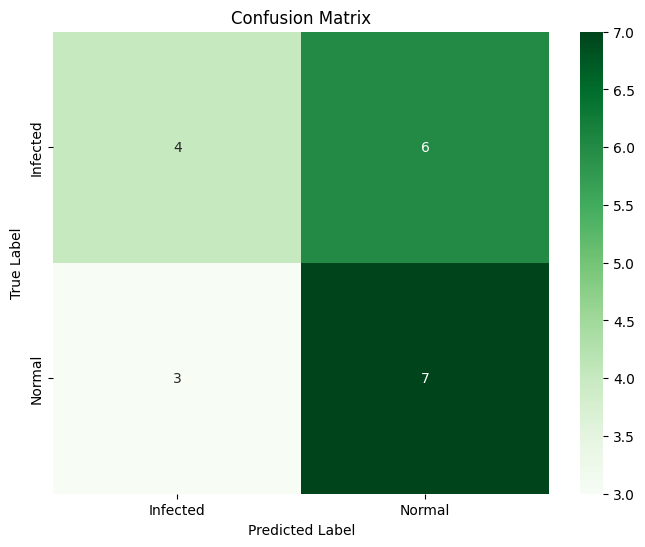

Accuracy: 0.55
Precision: 0.5384615384615384
Recall: 0.7
F1 Score: 0.608695652173913

Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.40      0.47        10
           1       0.54      0.70      0.61        10

    accuracy                           0.55        20
   macro avg       0.55      0.55      0.54        20
weighted avg       0.55      0.55      0.54        20


Confusion Matrix:
 [[4 6]
 [3 7]]
---------------------------------------


Using distance metric: hamming
Evaluation results for metric hamming


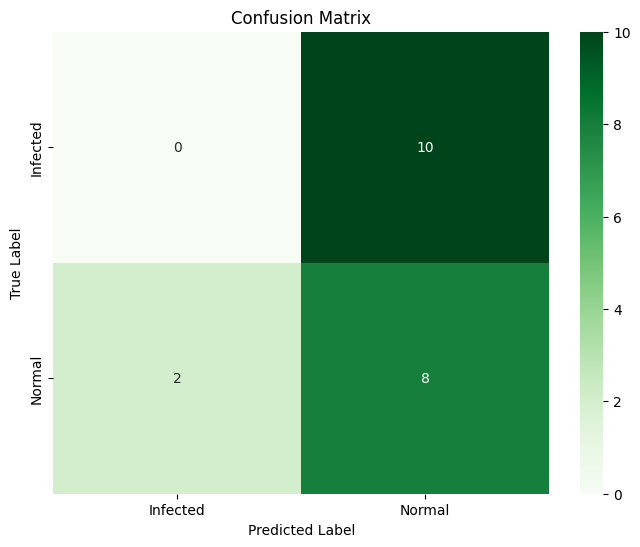

Accuracy: 0.4
Precision: 0.4444444444444444
Recall: 0.8
F1 Score: 0.5714285714285714

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.44      0.80      0.57        10

    accuracy                           0.40        20
   macro avg       0.22      0.40      0.29        20
weighted avg       0.22      0.40      0.29        20


Confusion Matrix:
 [[ 0 10]
 [ 2  8]]
---------------------------------------


In [45]:
distance_metrics = ['manhattan', 'chebyshev', 'minkowski', 'hamming']

for metric in distance_metrics:

    k_val = int(pow(len(data), .5))

    # Initialize KNN classifier with different distance metric
    knn = KNeighborsClassifier(n_neighbors=k_val, metric=metric)
    print("\n\nUsing distance metric:", metric)

    # Train the classifier
    knn.fit(X_train, y_train)

    # Make predictions
    y_pred = knn.predict(X_test)


    # Evaluate and display metrics
    print("Evaluation results for metric", metric)
    evaluate_classification(y_test, y_pred)
    print("---------------------------------------")

#### Cross validation with fixed K value and different metrics



Using distance metric: manhattan
Cross-validation F1 scores for metric manhattan
[0.75       0.8        0.76923077 0.75       0.85714286]
Mean F1 Score: 0.7852747252747253
---------------------------------------


Using distance metric: chebyshev
Cross-validation F1 scores for metric chebyshev
[0.69565217 0.6        0.42105263 0.66666667 0.52631579]
Mean F1 Score: 0.5819374523264683
---------------------------------------


Using distance metric: minkowski
Cross-validation F1 scores for metric minkowski
[0.58333333 0.76923077 0.71428571 0.69230769 0.83333333]
Mean F1 Score: 0.7184981684981684
---------------------------------------


Using distance metric: hamming
Cross-validation F1 scores for metric hamming
[0.66666667 0.66666667 0.66666667 0.66666667 0.66666667]
Mean F1 Score: 0.6666666666666666
---------------------------------------


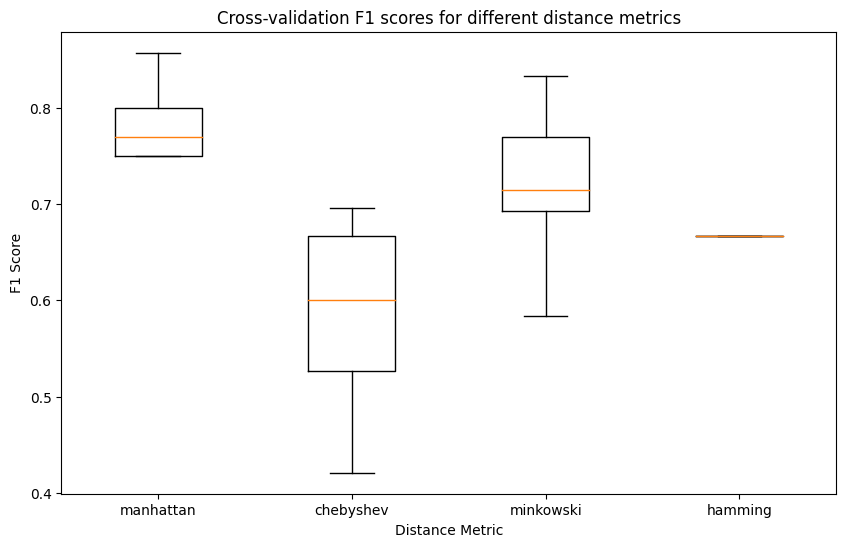

In [46]:
# List to store cross-validation F1 scores for each distance metric
cv_f1_scores = []

for metric in distance_metrics:

    # Initialize KNN classifier with different distance metric
    knn = KNeighborsClassifier(n_neighbors=5, metric=metric)
    print("\n\nUsing distance metric:", metric)

    # Perform cross-validation
    f1_scores = cross_val_score(knn, data, labels, cv=5, scoring='f1')  # 5-fold cross-validation
    cv_f1_scores.append(f1_scores)

    # Print cross-validation F1 scores
    print("Cross-validation F1 scores for metric", metric)
    print(f1_scores)
    print("Mean F1 Score:", f1_scores.mean())
    print("---------------------------------------")

# Plot boxplots of cross-validation F1 scores for each distance metric
plt.figure(figsize=(10, 6))
plt.boxplot(cv_f1_scores, labels=distance_metrics)
plt.xlabel('Distance Metric')
plt.ylabel('F1 Score')
plt.title('Cross-validation F1 scores for different distance metrics')
plt.show()

#### Implementing Grid Search CV

Best Parameters: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'uniform'}
Best F1 Score: 0.7823809523809524
Evaluation results:


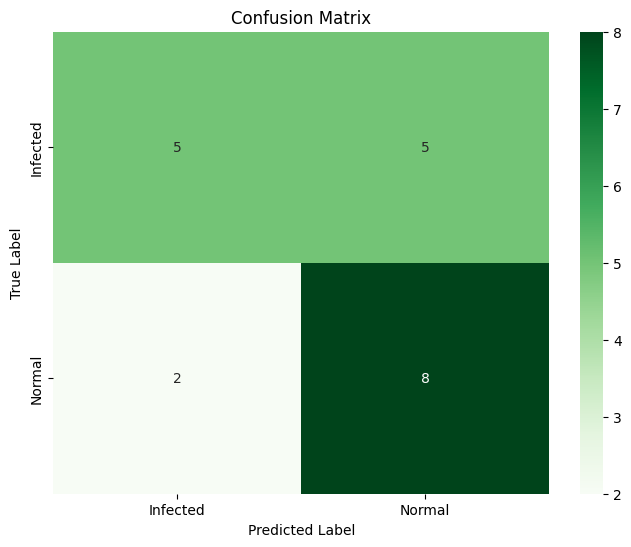

Accuracy: 0.65
Precision: 0.6153846153846154
Recall: 0.8
F1 Score: 0.6956521739130435

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.50      0.59        10
           1       0.62      0.80      0.70        10

    accuracy                           0.65        20
   macro avg       0.66      0.65      0.64        20
weighted avg       0.66      0.65      0.64        20


Confusion Matrix:
 [[5 5]
 [2 8]]


In [47]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19],  # Number of neighbors
    'weights': ['uniform', 'distance'],  # Weighting strategy
    'metric': ['euclidean', 'manhattan', 'chebyshev']  # Distance metric
}

# KNN classifier
knn = KNeighborsClassifier()

#  GridSearchCV
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='f1')

# Perform grid search
grid_search.fit(X_train, y_train)

# Print the best parameters and best F1 score
print("Best Parameters:", grid_search.best_params_)
print("Best F1 Score:", grid_search.best_score_)

# Best estimator
best_knn = grid_search.best_estimator_

# Predictions
y_pred = best_knn.predict(X_test)

# Evaluate and display metrics
print("Evaluation results:")
evaluate_classification(y_test, y_pred)